# Generalized Procrustes Analysis
Generalized Procrustes Analysis is an iterative technique for optimally rigidly aligning a set of shapes. The contents of this notebook are:

1. Simple example
2. Example with faces

First, let's import everything we need.

In [1]:
%matplotlib inline
from pathlib import Path

from menpo.transform import GeneralizedProcrustesAnalysis
from menpo.shape import PointCloud

import numpy as np
import matplotlib.pyplot as plt

## 1. Simple example

Let's make three `PointCloud` instances

In [2]:
src_1 = PointCloud(np.array([[-1.0, -1.0],
                             [1.0, -1.0],
                             [1.0, 1.0],
                             [-1.0, 1.0]]))

src_2 = PointCloud(np.array([[0.0, 0.0],
                             [1.5, 0.1],
                             [1.5, 1.5],
                             [0.1, 1.5]]))

src_3 = PointCloud(np.array([[-2.0, 0.0],
                             [0.0, 3.0],
                             [2.0, 0.0],
                             [0.0, -3.0]]))

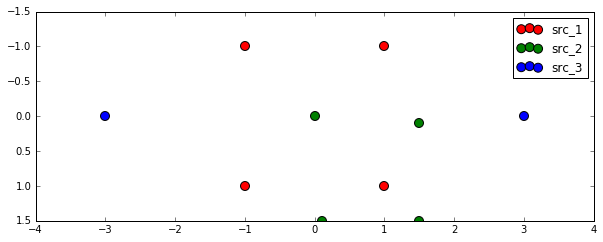

In [3]:
viewer = src_1.view(marker_face_colour='r', marker_size=80);
src_2.view(figure_id=viewer.figure_id, marker_face_colour='g', marker_size=80);
src_3.view(figure_id=viewer.figure_id, marker_face_colour='b', marker_size=80);
plt.legend(['src_1', 'src_2', 'src_3']);

`GeneralizedProcrustesAnalysis` accepts a list of `Shape` instances upon construction. This causes it to run it's iterative alignment process.

In [4]:
gpa = GeneralizedProcrustesAnalysis([src_1, src_2, src_3])

Printing the object gives you a summary of what happened

In [5]:
print(gpa)

Converged after 35 iterations with av. error 1.297239


GeneralizedProcrustesAnalysis provides a property called `.transforms`, which gives one transform per source that aligns it to the target frame. The target frame is also accessable at `.target`

In [6]:
print('There are {} transforms'.format(len(gpa.transforms)))
print('Each transform is a {}'.format(type(gpa.transforms[0])))
print('The target: {}'.format(gpa.target))

There are 3 transforms
Each transform is a <class 'menpo.transform.homogeneous.similarity.AlignmentSimilarity'>
The target: PointCloud: n_points: 4, n_dims: 2


The optimal transform found to align `src_1` is:

In [7]:
src_1_similarity = gpa.transforms[0]
print(src_1_similarity)

Similarity decomposing into:  
  CCW Rotation of 180.0 degrees about [0 0 1]
  UniformScale by 0.776521803371
  CCW Rotation of 145.9 degrees about [0 0 1]
  Translation by [ 0.25833333  0.25833333]
[[ 0.64328493 -0.43493747  0.25833333]
 [ 0.43493747  0.64328493  0.25833333]
 [ 0.          0.          1.        ]]


and for `src_2` we used:

In [8]:
src_2_similarity = gpa.transforms[1]
print(src_2_similarity)

Similarity decomposing into:  
  CCW Rotation of 180.0 degrees about [0 0 1]
  UniformScale by 1.06979326268
  CCW Rotation of 145.9 degrees about [0 0 1]
  Translation by [ 0.03588139 -0.89288118]
[[ 0.88623642 -0.59920166  0.03588139]
 [ 0.59920166  0.88623642 -0.89288118]
 [ 0.          0.          1.        ]]


`src_1_similarity` has a `source` which is the same as `src_1`:

In [9]:
print(src_1_similarity.source)
print(np.all(src_1 == src_1_similarity.source))

PointCloud: n_points: 4, n_dims: 2
True


The target of this object was set in the first iteration of the algorithm to the mean of all the sources:

In [10]:
print(src_1_similarity.target)

PointCloud: n_points: 4, n_dims: 2


Its simple to check how the alignment did

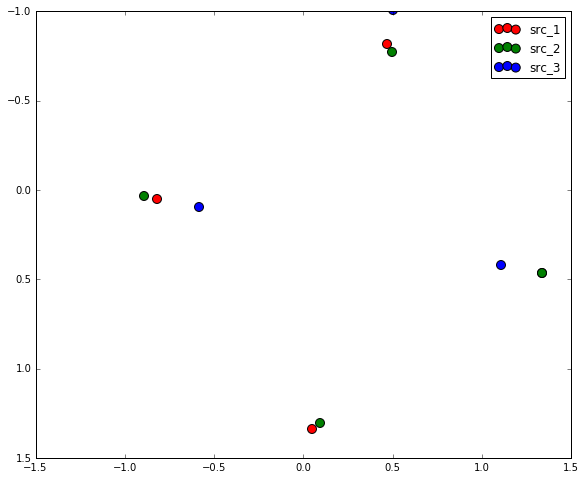

In [11]:
colours_list = ['r' ,'g', 'b']
for i, (t, a_c) in enumerate(zip(gpa.transforms, gpa.sources)):
    aligned_src = t.apply(a_c)
    aligned_src.view(marker_face_colour=colours_list[i], marker_size=80);
plt.legend(['src_1', 'src_2', 'src_3']);

## 2. Example with faces

In this example, we will use one of the most popular and widely used annotated facial databases, the Labeled Faces Parts in the Wild (LFPW) database. Both images and corresponding facial landmark annotations are publicly available and can be downloaded from the following link: 

* http://ibug.doc.ic.ac.uk/download/annotations/lfpw.zip/ 

In order to continue with this notebook, the user is required to simply: 
 
* Click on the previous link.
* Fill out the form with his/her details. 
* Proceed to download the LFPW database. 
* Unzip and save the LFPW database to a location of his/her like.
* Paste the path to the local copy of the LFPW database on the next cell.
 
Note that the `.zip` file containing the whole annotated database is of approximately 350MB.

In [12]:
#path_to_lfpw = '/vol/atlas/databases/lfpw/'
path_to_lfpw = Path('/Users/pts08/data/lfpw')

Let's load the shapes

In [13]:
import menpo.io as mio
shapes = [s['all'] for s in mio.import_landmark_files(path_to_lfpw / 'trainset' / '*.pts', verbose=True)]

Importing assets: [==========] 100% (811/811) - done.                           


We can visualize them using the `visualize_pointclouds` widget.

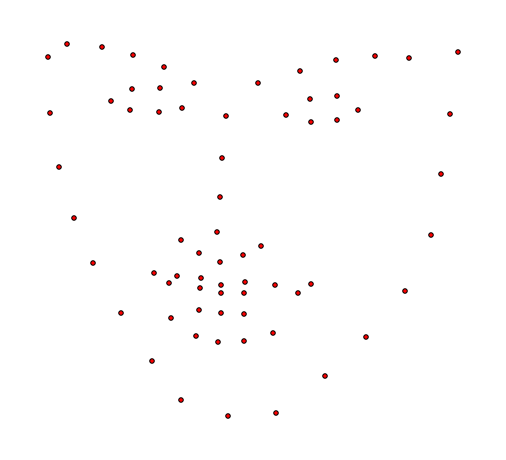

In [14]:
from menpowidgets import visualize_pointclouds

visualize_pointclouds(shapes)

It is very easy to align the shapes

In [15]:
from menpo.transform import Translation

# centralize shapes
centered_shapes = [Translation(-s.centre()).apply(s) for s in shapes]

# align centralized shape using Procrustes Analysis
gpa = GeneralizedProcrustesAnalysis(centered_shapes)

print(gpa)

# get the aligned shapes
aligned_shapes = [s.aligned_source() for s in gpa.transforms]

Converged after 4 iterations with av. error 80.789814


Let's see the result!

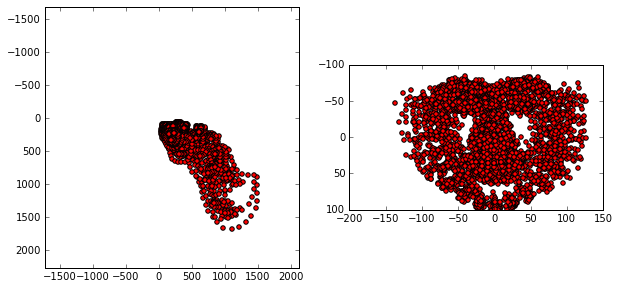

In [16]:
n_shapes = 101

plt.subplot(121)
plt.title('Before GPA')
for s in shapes[:n_shapes]:
    s.view(axes_x_limits=10, axes_y_limits=10)
    
plt.subplot(122)
plt.title('After GPA')
for s in aligned_shapes[:n_shapes]:
    s.view()